In [ ]:
import torch
import matplotlib.pyplot as plt

from gnn.src.data.dataset import InMemoQM9Dataset
from gnn.src.train.trainer import Trainer

from gnn.src.nn.schnet import SchNet
from torch.optim import Adam
from torch.optim.lr_scheduler import ExponentialLR
from gnn.src.data.utils import get_property

In [ ]:
dataset = InMemoQM9Dataset('./records')

In [ ]:
trainer = Trainer(
    dataset=dataset,
    device='cuda',
    validation_split = 0.1,
    shuffle_dataset = True,
    dataset_size=len(dataset)
)

In [ ]:
model=SchNet(n_interactions=1, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean1, losses_val_mean1 = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=5,
    models_dir='./models',
    checkpoint_frequency=10,
    property='U',
    map_property=lambda t: get_property(t, "U"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

In [ ]:
model=SchNet(n_interactions=2, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean2, losses_val_mean2 = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=5,
    models_dir='./models',
    checkpoint_frequency=10,
    property='U',
    map_property=lambda t: get_property(t, "U"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

In [ ]:
model=SchNet(n_interactions=3, n_features=64, n_filters=64)
loss_function=torch.nn.MSELoss()
optimizer=Adam(model.parameters(), lr=10e-6)
scheduler = ExponentialLR(optimizer, gamma=0.9)

losses_train_mean3, losses_val_mean3 = trainer.train(
    model=model,
    loss_function=loss_function,
    optimizer=optimizer,
    scheduler=scheduler,
    max_epochs=5,
    models_dir='./models',
    checkpoint_frequency=10,
    property='U',
    map_property=lambda t: get_property(t, "U"),
    aggregate_outputs=lambda outputs: torch.sum(outputs)
)

### loss

<details>
  <summary>n_interactions=1</summary>
  [171.0101439477996, 5.839956803734543, 1.4565256311580521, 0.7191787116491075, 0.3918557710114297]
</details>

<details>
  <summary>n_interactions=2</summary>
  [129.89458337178814, 4.3877232070725505, 1.0749843949437967, 0.5889826185779692, 0.3433030780562468]
</details>

<details>
  <summary>n_interactions=3</summary>
  [68.45534954535312, 2.32001445972433, 0.5712455504385344, 0.21235619949925046, 0.136550769383478]
</details>

In [ ]:
losses1 = [130.1637772449177, 4.440250103322353, 1.1745135070090797, 0.30580211691248216, 0.22164384038151252]
losses2 = [95.98135251553305, 3.104376287168341, 0.7732497885156904, 0.17741627781122965, 0.23744911656813805]
losses3 = [68.45534954535312, 2.32001445972433, 0.5712455504385344, 0.21235619949925046, 0.136550769383478]

fig, axs = plt.subplots(nrows=1)
plt.tight_layout()
axs.plot(range(1,5), losses1[1:], c='g')
axs.plot(range(1,5), losses2[1:], c='b')
axs.plot(range(1,5), losses3[1:], c='r')
axs.legend (('T = 1', 'T = 2', 'T = 3'))
axs.set(xlabel='Число эпох', ylabel='MSE U, Ha')
plt.show()

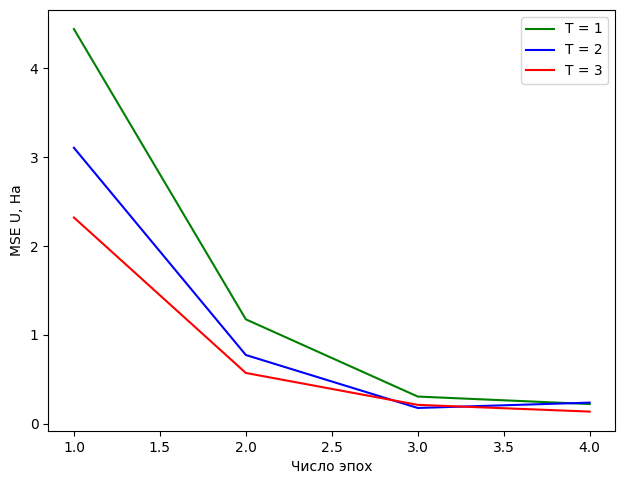